# HackerEarth Machine Learning : solving citizens’ grievances

### Predict the importance

Human rights are basic rights that belong to people all around the world irrespective of race, color, sex, language, religion, political or other opinions, national or social origin, property, birth, etc. These rights include the right to life and liberty, freedom from slavery and torture, freedom of opinion and expression, the right to work and education, etc. It is meant to enable human beings to live with dignity, freedom, equality, justice, and peace. Human rights are essential to the full development of individuals and communities.

**In this problem, given dataset contains grievances of various people living in a country. Task is to predict the importance of the grievance with respect to various articles, constitutional declarations, enforcement, resources, and so on, to help the government prioritize which ones to deal with and when.**

### Data description
The dataset folder consists of the following three .csv files:

train.csv: Contains 8878 rows and 328 columns <br>
test.csv: Contains 4760 rows and 327 columns <br>
sample_submission.csv: 5 rows and 2 columns <br>

In [1]:
# Import pandas, numpy, matplotlib, seaborn libraries
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from tabulate import tabulate

# hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')
%config IPCompleter.greedy=True
%matplotlib inline

<br>

# exploratory data analytics
* **In this section, data is explored for its cardinality, null values, duplicates, target class distribution etc.**
* To consider differences between train and test data [such as duplicates features, null features etc.]:
    * EDA is performed on whole data. So, train and test data is combined for EDA
    * **However, *Preprocessing* and *Prediction Model Training* is done ONLY ON TRAIN DATA**

## Data ingestion
Read train and test datasets

### Read train data
check data features and size of train data

In [2]:
# read in data from train.csv file to pandas dataframe.
df_train = pd.read_csv('dataset/train.csv',  keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

In [3]:
df_train.head(2)

,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,...,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,2052/08,MS WORD,ru,Russian Federation,NaN,CASE OF KOKOSHKINA v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0528JUD000205208,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4
1,4728/07,MS WORD,tr,Turkey,NaN,CASE OF ÖZCAN v. TURKEY,COMMITTEE,ECLI:CE:ECHR:2018:0710JUD000472807,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4


In [4]:
df_train.shape

(8878, 328)

### Check target class balance
Target class 'importance' has 4 unique values
distribution of values can be plotted using function

<AxesSubplot:>

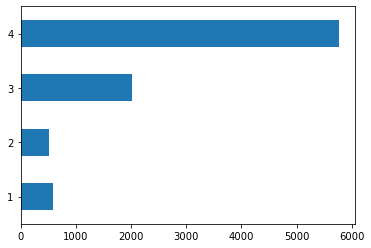

In [5]:
df_train['importance'].value_counts().plot(kind='barh')

### Read test data
Check data features and size of test data

In [6]:
# read in data from test.csv file to pandas dataframe.
df_test = pd.read_csv('dataset/test.csv',  keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

In [7]:
df_test.head(2)

,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,...,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7
0,1194/04,MS WORD,mk,North Macedonia,NaN,"CASE OF CAMINSKI v. ""THE FORMER YUGOSLAV REPUB...",COMMITTEE,ECLI:CE:ECHR:2011:0224JUD000119404,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
1,53865/11,MS WORD,ua,Ukraine,NaN,CASE OF KUSHCH v. UKRAINE,CHAMBER,ECLI:CE:ECHR:2015:1203JUD005386511,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0


In [8]:
df_test.shape

(4760, 327)

## Concat train and test data to form complete dataset for EDA
* **Concat train and test data to perform EDA**
* **Drop target variable *'importance'* from train data to match number of features in both dataframes**

In [9]:
df = pd.concat([df_train.drop('importance', axis=1), df_test])

In [10]:
df.head(2)

,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,...,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7
0,2052/08,MS WORD,ru,Russian Federation,NaN,CASE OF KOKOSHKINA v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0528JUD000205208,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
1,4728/07,MS WORD,tr,Turkey,NaN,CASE OF ÖZCAN v. TURKEY,COMMITTEE,ECLI:CE:ECHR:2018:0710JUD000472807,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0


In [11]:
df.shape

(13638, 327)

### Count of Unique instances in features
We can locate primary key feature of dataframe : **ecli**

In [12]:
print(tabulate(pd.DataFrame(df.nunique()), headers=["Feature", "unique instances"]), "\n\n\n")

Feature                              unique instances
---------------------------------  ------------------
appno                                           13467
application                                         1
country.alpha2                                     46
country.name                                       46
decisiondate                                      274
docname                                         13201
doctypebranch                                       3
ecli                                            13638
introductiondate                                  720
issue.0                                          3095
issue.1                                          1710
issue.10                                           29
issue.11                                           25
issue.12                                           21
issue.13                                           16
issue.14                                           14
issue.15                    

### Count of null samples  in features

In [13]:
null_samples = df.isna().sum()
null_data = np.array(
    [list(null_samples.index),
     list(null_samples.values),
     np.round(np.array(null_samples.values)*100/df.shape[0], 2)
    ]
)
print(tabulate(pd.DataFrame(null_data).T, headers=["Feature", "null samples",  "% null samples"]), "\n\n\n")

     Feature                              null samples    % null samples
---  ---------------------------------  --------------  ----------------
  0  appno                                           0              0
  1  application                                     0              0
  2  country.alpha2                                  0              0
  3  country.name                                    0              0
  4  decisiondate                                12603             92.41
  5  docname                                         0              0
  6  doctypebranch                                   0              0
  7  ecli                                            0              0
  8  introductiondate                            12602             92.4
  9  issue.0                                     10162             74.51
 10  issue.1                                     11780             86.38
 11  issue.10                                    13609             99.79


### find duplicate samples or features in dataset

**duplicate samples are NOT found**

In [14]:
# Check for duplicate rows
#Print the number of duplicate rows, without the original rows that were duplicated

# Check for duplicate rows for primary key "Animal ID"
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated(subset = "ecli").sum()) 

# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(subset = "ecli",keep=False)].shape[0])


Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate rows (including first) in the table is: 0


**50 duplicate features are FOUND**

In [15]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
dfT = df.T

# Check for duplicate columns.
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())

#Print the number of duplicates, including the original columns that were duplicated
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  50
Number of duplicate (including first) columns in the table is:  97


**Result : Duplicate columns (features) do exist**
 - **data samples** : Duplicate samples do not exist. Feature **ecli** has 13638 unique values - which is equal to number of data entries. Logically, its a primary key for the dataset. Hence, duplicacies are checked with its respect and none are found.
 - **features** : Total 97 features are invoved in duplicate entries and 50 features are duplicates of another 47 distinct features. Visualization in following cell helps to check out relations. 

## Drop duplicate features

In [16]:
# Obtain list of unique columns AND duplicate column. Unique columns are final columns to be retained. 
retained_columns = dfT.drop_duplicates(keep="first").T.columns.values
duplicate_columns = list(set(list(df.columns))- set(retained_columns))
df = df[retained_columns]

print(tabulate(pd.DataFrame(df.dtypes), headers=["Feature", "Data Type"]), "\n")

# Out of 327 features, 50 duplicate features are dropped. New dimensions must be 13638 samples * 277 features
print("\nDataframe dimensions are: {} samples * {} features".format(*df.shape))

Feature                            Data Type
---------------------------------  -----------
appno                              object
application                        object
country.alpha2                     object
country.name                       object
decisiondate                       object
docname                            object
doctypebranch                      object
ecli                               object
introductiondate                   object
issue.0                            object
issue.1                            object
issue.10                           object
issue.11                           object
issue.12                           object
issue.13                           object
issue.14                           object
issue.15                           object
issue.16                           object
issue.17                           object
issue.18                           object
issue.19                           object
issue.2                   

In [17]:
print(duplicate_columns)

['paragraphs=26', 'paragraphs=19', 'paragraphs=32', 'paragraphs=16', 'paragraphs=8', 'paragraphs=35', 'documentcollectionid=JUDGMENTS', 'paragraphs=46', 'paragraphs=36', 'paragraphs=P12-1', 'paragraphs=29', 'paragraphs=5', 'paragraphs=25', 'paragraphs=43', 'paragraphs=41', 'paragraphs=11', 'paragraphs=15', 'applicability=29', 'paragraphs=1', 'paragraphs=13', 'applicability=15', 'applicability=31', 'paragraphs=52', 'paragraphs=18', 'documentcollectionid=ENG', 'paragraphs=28', 'paragraphs=3', 'paragraphs=7', 'paragraphs=34', 'paragraphs=17', 'paragraphs=33', 'paragraphs=37', 'paragraphs=27', 'paragraphs=53', 'paragraphs=38', 'paragraphs=P13-1', 'paragraphs=10', 'paragraphs=56', 'paragraphs=39', 'paragraphs=9', 'kpdate', 'paragraphs=4', 'paragraphs=14', 'paragraphs=P7-1-1', 'paragraphs=2', 'paragraphs=', 'paragraphs=12', 'paragraphs=6', 'paragraphs=57', 'paragraphs=30']


<br>

# Data Quality Plan

| Features                  | Data Classification| Subtype    | Data type  | Data quality issue | Solution Strategy |
|:------------------------- |:------------------ |:---------- |:-----------|:-------------- |:-------------- | 
| appno                                 | catagorical        | nominal    | category   |||
| application                           | catagorical        | nominal    | category   |||
| country.alpha2                        | numeric            | continuous | datetime[object]   |||
| country.name                          | numeric            | continuous | datetime[object]   |||
| decisiondate                          | catagorical        | nominal    | category   |||
| docname                               | catagorical        | nominal    | category   |||
| doctypebranch                         | catagorical        | Ordinal    | category    |||
| ecli                                  | catagorical        | nominal    | category   |||
| introductiondate                      | catagorical        | nominal    | category   |||
| itemid                                | numeric            | continuous | int64      |||
| judgementdate                         | catagorical        | nominal    | category   |||
| kpdate                                | catagorical        | nominal    | category   |||
| languageisocode                       | catagorical        | nominal    | category   |||
| originatingbody                       | numeric            | continuous | datetime[object]   |||
| originatingbody_name                  | numeric            | continuous | datetime[object]   |||
| originatingbody_type                  | numeric            | continuous | datetime[object]   |||
| parties.0                             | catagorical        | nominal    | category   |||
| parties.1                             | catagorical        | nominal    | category   |||
| parties.2                             | numeric            | continuous | int64      |||
| rank                                  | catagorical        | nominal    | category   |||
| respondent.0                          | catagorical        | nominal    | category   |||
| respondent.1                          | catagorical        | nominal    | category   |||
| respondent.2                          | catagorical        | nominal    | category   |||
| respondent.3                          | catagorical        | nominal    | category   |||
| respondent.4                          | catagorical        | nominal    | category   |||
| respondentOrderEng                    | catagorical        | nominal    | category   |||
| separateopinion                       | catagorical        | nominal    | category   |||
| sharepointid                          | catagorical        | nominal    | category   |||
| typedescription                       | catagorical        | nominal    | category   |||
| issue.{0-26}                          | catagorical        | nominal    | category   |||
| article={27 numbers}                  | catagorical        | nominal    | category   |||
| documentcollectionid=<br>CASELAW      | catagorical        | nominal    | category   |||
| documentcollectionid=<br>JUDGMENTS    | catagorical        | nominal    | category   |||
| documentcollectionid=<br>CHAMBER      | catagorical        | nominal    | category   |||
| documentcollectionid=<br>ENG          | catagorical        | nominal    | category   |||
| documentcollectionid=<br>COMMITTEE    | catagorical        | nominal    | category   |||
| documentcollectionid=<br>GRANDCHAMBER | catagorical        | nominal    | category   |||
| applicability={61 numbers}            | catagorical        | nominal    | category   |||
| ccl_article={25 Type}                 | catagorical        | nominal    | category   |||
| paragraphs={132 numbers}              | catagorical        | nominal    | category   |||
| importance                            | catagorical        | nominal    | category   |||
